In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importing the dataset
dataset_new = pd.read_excel('IDataset1.xlsx')
dataset_new['Charge_type'] = dataset_new['Charge_type'].astype('category')
dataset_new.describe(include='category')

,Charge_type
count,546
unique,2
top,CompB
freq,280


In [3]:
dataset = dataset_new.rename(columns={'Charge_type': 'Charge type',
                            'Charge_size' : 'Charge size',
                            'Standoff_distance' : 'Standoff distance',
                            'Impulse' : 'Peak impulse'})

In [3]:
dataset.corr()

,Charge size,Standoff distance,Peak impulse
Charge size,1.000000e+00,4.052073e-16,0.489460
Standoff distance,4.052073e-16,1.000000e+00,-0.713774
Peak impulse,4.894595e-01,-7.137742e-01,1.000000


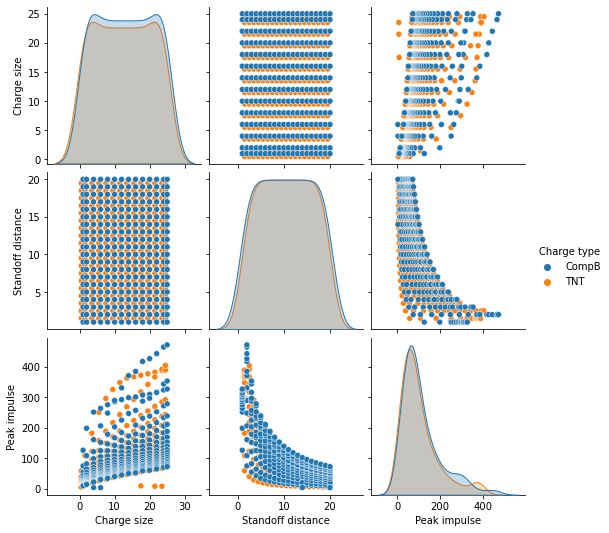

In [4]:
sns.pairplot(dataset, hue = 'Charge type')

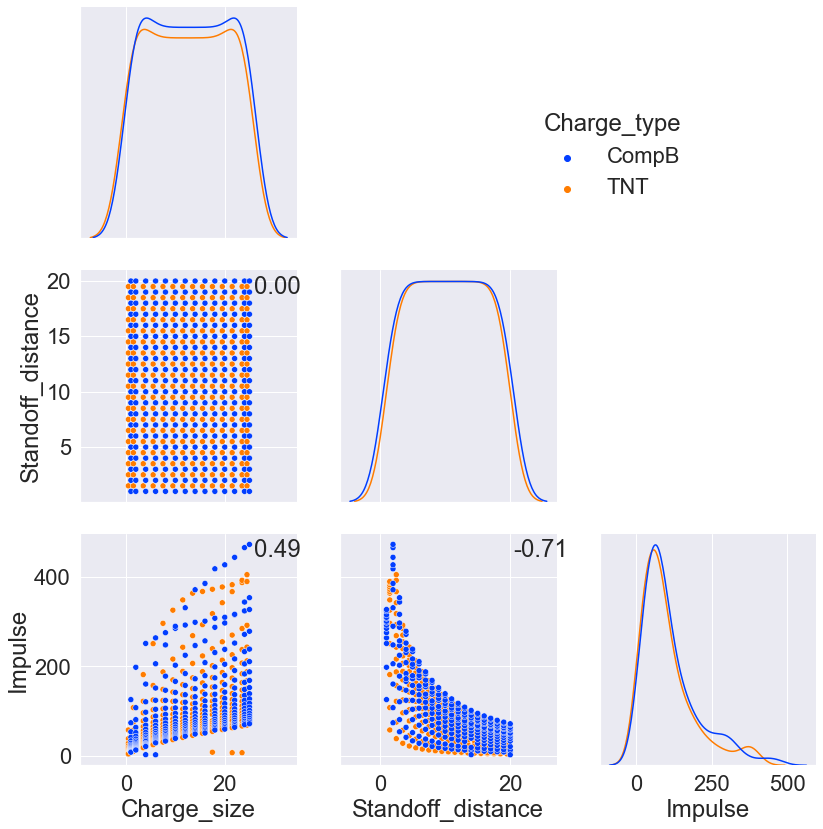

In [5]:
# Calculate the value
corrMatrix = dataset.corr()

# Set the font scale for the plot
sns.set(font_scale=2)

# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= dataset,
                    hue = "Charge_type",
                    vars = ["Charge_size", "Standoff_distance", "Impulse"],
                    palette="bright",
                    diag_sharey=False,
                    corner=True,
                    height = 4)

# Map a scatter plot to the upper triangle
grid.map_offdiag(sns.scatterplot)

# Map a histogram to the diagonal
grid.map_diag(sns.kdeplot)

# Map a density plot to the lower triangle
#grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid.add_legend(loc = (0.65,0.75))

# Add correlation coefficients to the plot
for i, j in zip(*plt.np.tril_indices_from(grid.axes, k=-1)):
    r = corrMatrix.iloc[i, j]
    grid.axes[i, j].annotate(f"{r:.2f}", xy=(.8, .9), xycoords='axes fraction')


sns.despine()
plt.show()

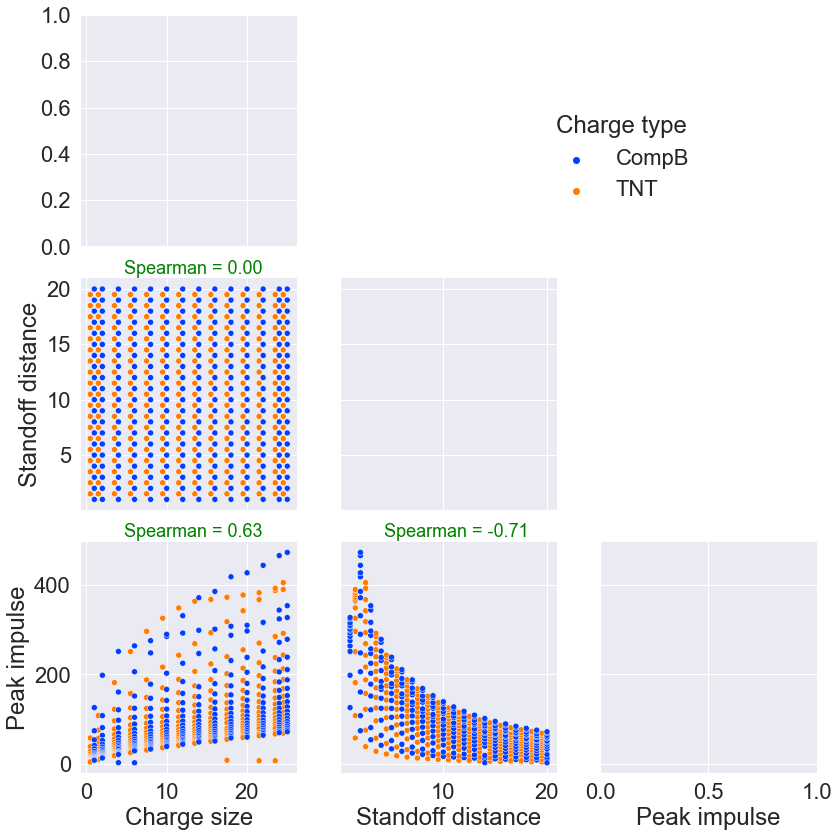

In [6]:
# Calculate the value
corrMatrix1 = dataset.corr(method = 'kendall')
corrMatrix2 = dataset.corr(method = 'spearman')

# Set the font scale for the plot
sns.set(font_scale=2)

# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= dataset,
                    hue = "Charge type",
                    vars = ["Charge size", "Standoff distance", "Peak impulse"],
                    palette="bright",
                    diag_sharey=False,
                    corner=True,
                    height = 4)

# Map a scatter plot to the upper triangle
grid.map_offdiag(sns.scatterplot)

# Map a histogram to the diagonal
#grid.map_diag(sns.kdeplot)


# Map a density plot to the lower triangle
#grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid.add_legend(loc = (0.65,0.75))

# Add correlation coefficients to the plot
#for i, j in zip(*plt.np.tril_indices_from(grid.axes, k=-1)):
 #   r1 = corrMatrix1.iloc[i, j]
  #  grid.axes[i, j].annotate(f"kendall = {r1:.2f}", xy=(0.5, 1.05), xycoords='axes fraction', size = 15)

# Add correlation coefficients to the plot
for l, m in zip(*plt.np.tril_indices_from(grid.axes, k=-1)):
    r2 = corrMatrix2.iloc[l, m]
    grid.axes[l, m].annotate(f"Spearman = {r2:.2f}", xy=(.2, 1.02), xycoords='axes fraction', size = 18, color = 'Green')


sns.despine()
plt.show()

68.0 8.0


(0.0, 73.0)

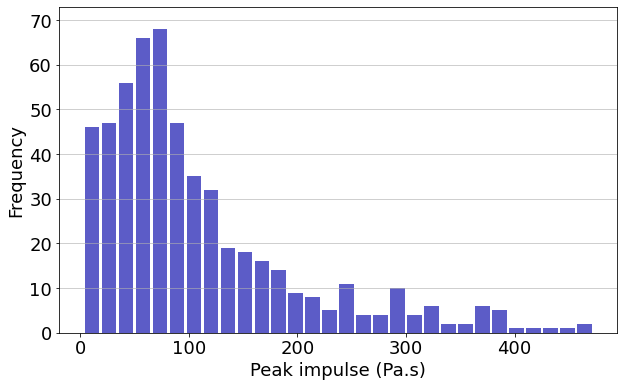

In [14]:
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x= dataset['Peak impulse'], bins= 30, color='#0504aa',
                            alpha=0.65, rwidth=0.85)
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Peak impulse (Pa.s)')
plt.ylabel('Frequency')

#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
print (maxfreq, maxfreq % 10)
# Set a clean upper y-axis limit.
plt.ylim(ymax=(np.ceil(maxfreq / 10)+0.5) * 10 if maxfreq % 10 == 0 else maxfreq + 5)
#plt.xlim(0, 500)

280.0 0.0


(0.0, 285.0)

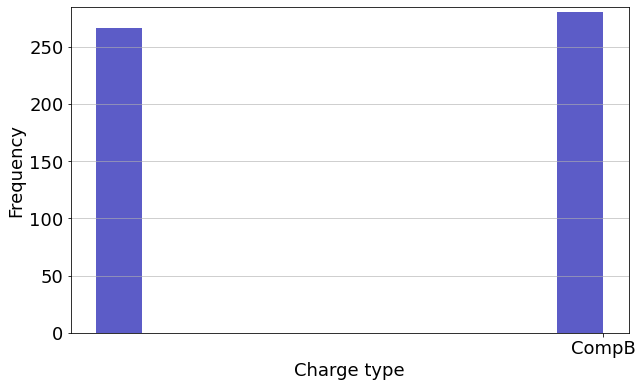

In [23]:
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x= dataset['Charge type'], bins= 'auto', color='#0504aa',
                            alpha=0.65, rwidth=1)
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Charge type')
plt.ylabel('Frequency')
#plt.xticks(np.linspace(0, 2, 3)[1::2])

#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
print (maxfreq, maxfreq % 10)
# Set a clean upper y-axis limit.
plt.ylim(ymax=(np.ceil(maxfreq / 10)+0.5) * 10 if maxfreq % 10 == 0 else maxfreq + 5)
#plt.xlim(0, 500)

Text(0, 0.5, 'Frequency')

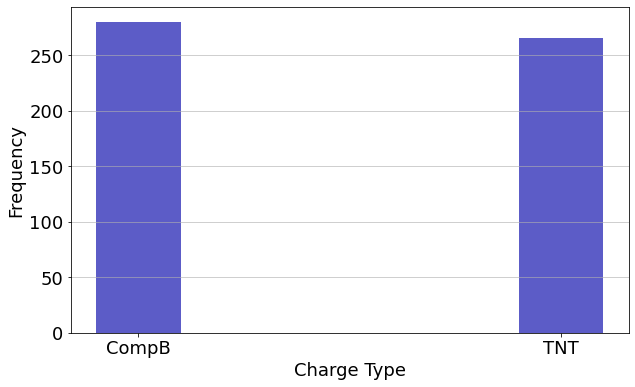

In [38]:
categories = dataset['Charge type'].value_counts().index
counts = dataset['Charge type'].value_counts().values
plt.figure(figsize=(10,6))
plt.bar(categories, counts, width=0.2, color='#0504aa', alpha=0.65)
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Charge Type')
plt.ylabel('Frequency')